<a href="https://colab.research.google.com/github/Labdhiiii/GIT-Learning/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [93]:
!pip install tensorflow opencv-python matplotlib

In [94]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.2.0.38

Load Data

In [95]:
import tensorflow as tf
import os

In [96]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU Available: []


In [97]:
os.path.join('data','happy')

'data/happy'

In [98]:
import zipfile
import os

zip_path = "/content/data.zip"  # change this if your filename is different
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped!")


Unzipped!


In [99]:
import cv2
import imghdr

In [100]:
data_dir="data"

In [101]:
image_exts=['jpeg','png','jpg','bmp']

In [102]:
cv2.imread(os.path.join('data','NORMAL','IM-0001-0001.jpeg'))
#numpy array of image


array([[[ 0,  0,  0],
        [32, 32, 32],
        [33, 33, 33],
        ...,
        [33, 33, 33],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [ 0,  0,  0]]], dtype=uint8)

In [103]:
img_info=cv2.imread(os.path.join('data','NORMAL','IM-0003-0001.jpeg'))

In [104]:
img_info.shape
#channel 3= colored image

(1509, 2111, 3)

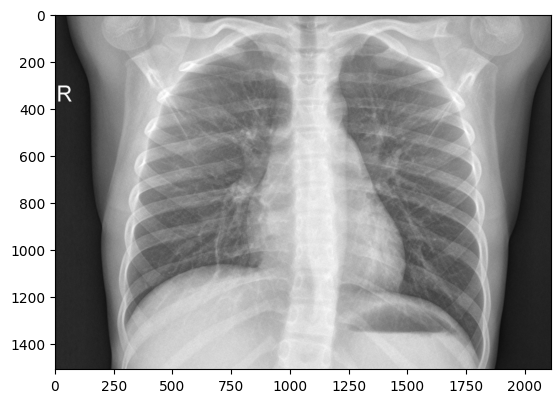

In [105]:
import matplotlib.pyplot as plt
plt.imshow(img_info)

In [106]:
#removing dodgy image
for image_class in os.listdir(data_dir):
  # print(image_class) #PNEUMONIA, NORMAL
  for image in os.listdir(os.path.join(data_dir,image_class)):
    # print(image) #all imgs in PNEUMONIA, NORMAL
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [107]:
#tf.data.Dataset??- Documentation
# tf.data.Dataset.list_files

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 624 files belonging to 2 classes.


In [110]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [111]:
data_iterator=data.as_numpy_iterator()

In [112]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7eb165af8c50>)

In [113]:
batch=data_iterator.next()

In [114]:
len(batch) #images and labels so, 2.

2

In [115]:
batch[0]

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.69787598e+01, 1.69787598e+01, 1.69787598e+01],
         [1.30000000e+01, 1.30000000e+01, 1.30000000e+01],
         [1.30000000e+01, 1.30000000e+01, 1.30000000e+01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.79699707e+01, 1.79699707e+01, 1.79699707e+01],
         [1.42976074e+01, 1.42976074e+01, 1.42976074e+01],
         [1.30000000e+01, 1.30000000e+01, 1.30000000e+01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.89760742e+01, 1.89760742e+01, 1.89760742e+01],
         [

In [116]:
batch[1]

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

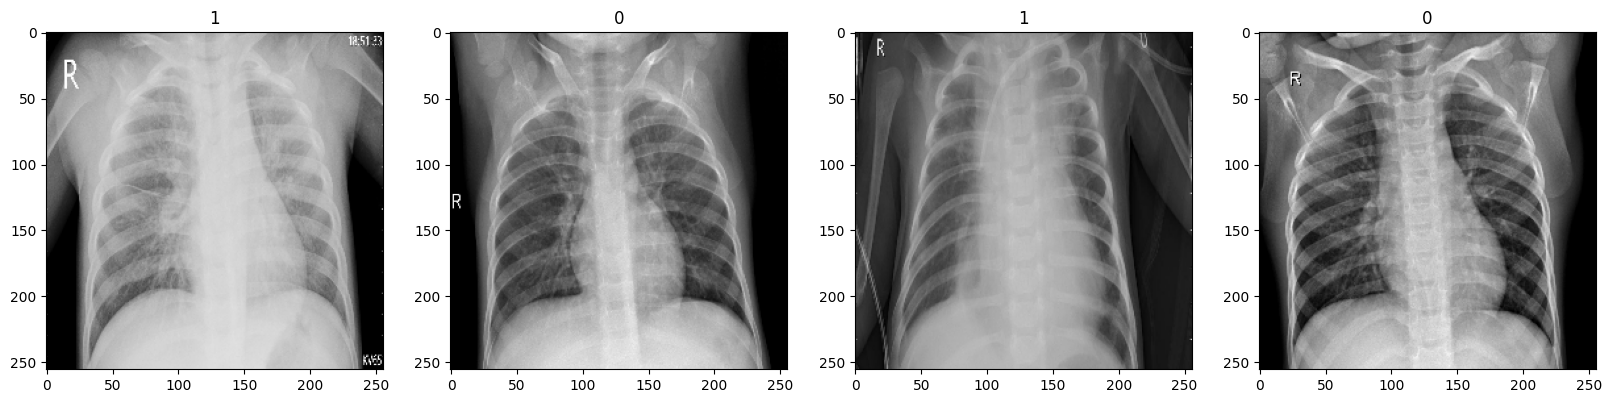

In [117]:
#to chk which flag is assigned to which image
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

  #1- Pnemonia, 0-Normal

Preprocess Data



*   Scale Data






In [118]:
scaled=batch[0]/255

In [119]:
scaled.max()

np.float32(1.0)

In [120]:
data=data.map(lambda x,y: (x/255,y))

In [121]:
data.as_numpy_iterator().next()[1].max()

np.int32(1)

In [122]:
scaled_iterator=data.as_numpy_iterator()

In [123]:
batch=scaled_iterator.next()

In [124]:
batch

(array([[[[5.0980395e-01, 5.0980395e-01, 5.0980395e-01],
          [5.1667434e-01, 5.1667434e-01, 5.1667434e-01],
          [5.1763940e-01, 5.1763940e-01, 5.1763940e-01],
          ...,
          [3.4635416e-01, 3.4635416e-01, 3.4635416e-01],
          [8.6014092e-02, 8.6014092e-02, 8.6014092e-02],
          [2.0590533e-01, 2.0590533e-01, 2.0590533e-01]],
 
         [[5.1702666e-01, 5.1702666e-01, 5.1702666e-01],
          [5.2355242e-01, 5.2355242e-01, 5.2355242e-01],
          [5.1372552e-01, 5.1372552e-01, 5.1372552e-01],
          ...,
          [2.3449755e-01, 2.3449755e-01, 2.3449755e-01],
          [2.3530944e-01, 2.3530944e-01, 2.3530944e-01],
          [2.1488971e-01, 2.1488971e-01, 2.1488971e-01]],
 
         [[5.2445620e-01, 5.2445620e-01, 5.2445620e-01],
          [5.2941179e-01, 5.2941179e-01, 5.2941179e-01],
          [5.1779258e-01, 5.1779258e-01, 5.1779258e-01],
          ...,
          [2.5814950e-01, 2.5814950e-01, 2.5814950e-01],
          [2.3338695e-01, 2.3338695e-

In [125]:
batch[0].max()

np.float32(1.0)

In [126]:
batch[1].min()

np.int32(0)



*   Split Data




In [127]:
len(data)

20

In [128]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [129]:
train_size

14

In [130]:
val_size

4

In [131]:
test_size

2

In [132]:
train_size+val_size+test_size


20

In [133]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Modelling- Deep Learning

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#conv2d is for Convolutional Layer
#max pooling layers
#dense- fully connected layer

In [135]:
model=Sequential()

In [136]:
#3 convoluational and max pooling layers

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [139]:
logdir='logs'

In [140]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [141]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.5373 - loss: 0.8077 - val_accuracy: 0.6016 - val_loss: 0.7133
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7030 - loss: 0.6127 - val_accuracy: 0.8359 - val_loss: 0.4264
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8319 - loss: 0.4051 - val_accuracy: 0.8984 - val_loss: 0.2463
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9060 - loss: 0.2365 - val_accuracy: 0.8906 - val_loss: 0.2363
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9137 - loss: 0.2054 - val_accuracy: 0.9062 - val_loss: 0.2069
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9536 - loss: 0.1271 - val_accuracy: 0.9531 - val_loss: 0.1235
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9422 - loss: 0.1737 - val_accuracy: 0.9219 - val_loss: 0.1723
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9325 - loss: 0.1608 - val_accuracy: 0.9688 - val_loss:

In [142]:
hist.history

{'accuracy': [0.6004464030265808,
  0.75,
  0.8415178656578064,
  0.8950892686843872,
  0.9263392686843872,
  0.9486607313156128,
  0.9397321343421936,
  0.9397321343421936,
  0.9620535969734192,
  0.9441964030265808,
  0.9486607313156128,
  0.9642857313156128,
  0.9754464030265808,
  0.953125,
  0.9419642686843872,
  0.9508928656578064,
  0.9754464030265808,
  0.984375,
  0.9910714030265808,
  0.9665178656578064],
 'loss': [0.7132386565208435,
  0.5569254755973816,
  0.3803459703922272,
  0.2475115805864334,
  0.20039401948451996,
  0.14563335478305817,
  0.17023073136806488,
  0.14143574237823486,
  0.10360066592693329,
  0.13185696303844452,
  0.10744015127420425,
  0.08333861082792282,
  0.07188200205564499,
  0.11658851057291031,
  0.14159229397773743,
  0.10869111865758896,
  0.06924273073673248,
  0.04489633068442345,
  0.03943655267357826,
  0.07169874757528305],
 'val_accuracy': [0.6015625,
  0.8359375,
  0.8984375,
  0.890625,
  0.90625,
  0.953125,
  0.921875,
  0.96875,
  0

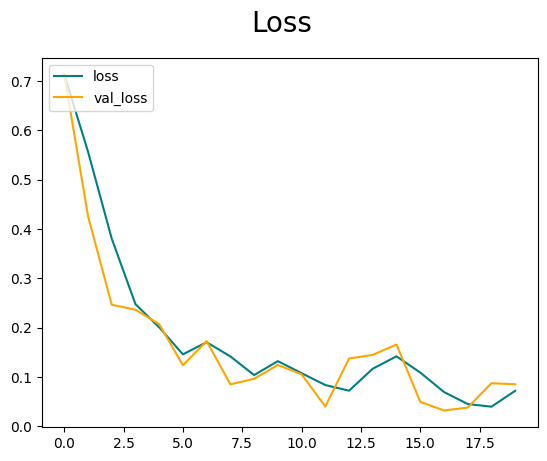

In [143]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()


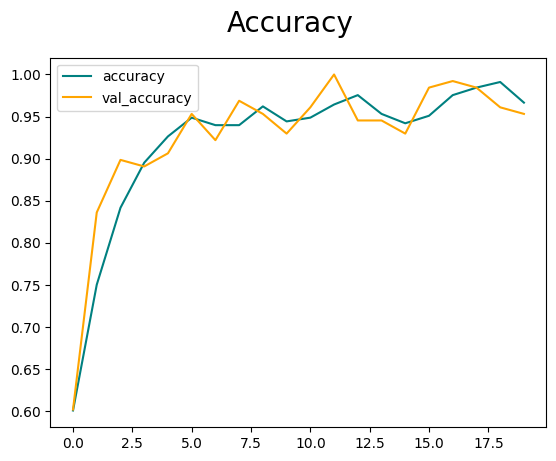

In [144]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()


Evaluating the Model

Evaluate

In [145]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy


In [146]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [147]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [148]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9714285731315613, Recall: 1.0, Accuracy: 0.9791666865348816


Test

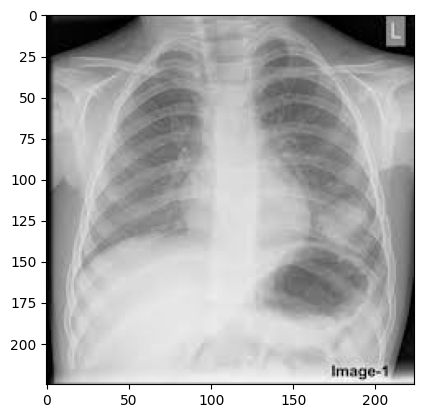

In [149]:
img=cv2.imread("/content/chest_xray_image.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

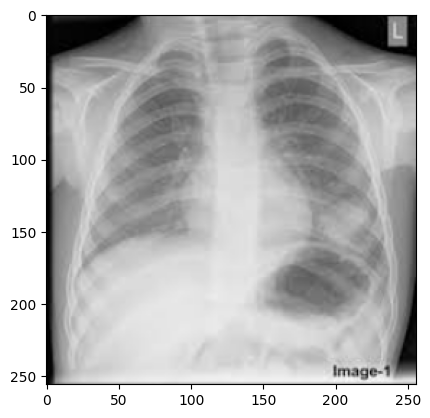

In [150]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [151]:
np.expand_dims(resize,0)

array([[[[  8.       ,   8.       ,   8.       ],
         [  4.75     ,   4.75     ,   4.75     ],
         [  6.0625   ,   6.0625   ,   6.0625   ],
         ...,
         [  6.9375   ,   6.9375   ,   6.9375   ],
         [ 12.       ,  12.       ,  12.       ],
         [ 25.       ,  25.       ,  25.       ]],

        [[  7.1816406,   7.1816406,   7.1816406],
         [  4.5965576,   4.5965576,   4.5965576],
         [  6.0625   ,   6.0625   ,   6.0625   ],
         ...,
         [  3.612915 ,   3.612915 ,   3.612915 ],
         [  9.135742 ,   9.135742 ,   9.135742 ],
         [ 16.816406 ,  16.816406 ,  16.816406 ]],

        [[  6.3027344,   6.3027344,   6.3027344],
         [  4.4317627,   4.4317627,   4.4317627],
         [  6.0625   ,   6.0625   ,   6.0625   ],
         ...,
         [  8.888916 ,   8.888916 ,   8.888916 ],
         [ 14.426758 ,  14.426758 ,  14.426758 ],
         [ 16.394531 ,  16.394531 ,  16.394531 ]],

        ...,

        [[  4.6054688,   4.6054688,   

  #1- Pnemonia, 0-Normal

In [152]:
ywhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [153]:
ywhat

array([[0.7138414]], dtype=float32)

In [154]:
if ywhat<0.5:
  print(f'Predicted class is Normal')
else:
  print(f'Predicted class is Pnemonia')

Predicted class is Pnemonia


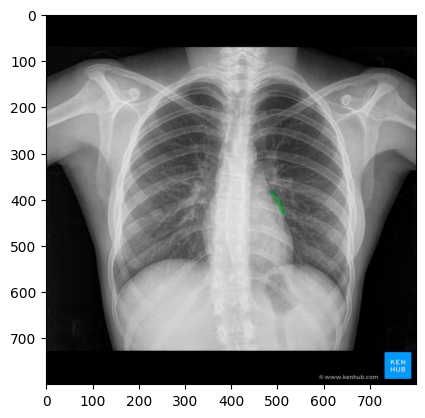

In [155]:
img=cv2.imread("/content/chest_xray_image_n.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

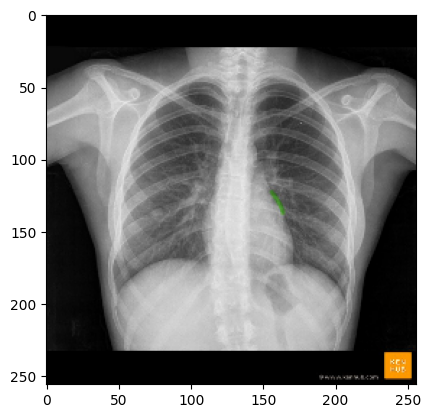

In [156]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [157]:
ywhat2=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [158]:
ywhat2

array([[0.01987208]], dtype=float32)

In [159]:
if ywhat2<0.5:
  print(f'Predicted class is Normal')
else:
  print(f'Predicted class is Pnemonia')

Predicted class is Normal


Saving the Model

In [160]:
from tensorflow.keras.models import load_model

In [161]:
model.save(os.path.join('models','imageClassifierChestXray.h5'))

In [162]:
new_model=load_model(os.path.join('models','imageClassifierChestXray.h5'))

In [165]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


In [166]:
if yhatnew<0.5:
  print(f'Predicted class is Normal')
else:
  print(f'Predicted class is Pnemonia')

Predicted class is Normal
